In [1]:
# import all the things
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import ipyleaflet
import numpy as np
import bqplot
%matplotlib inline

Let's first play around with different projections in bqplot:

In [4]:
# scale
sc_geo = bqplot.Gnomonic() # not a great projection!

# "axis"
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# no interactions right now
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0}) # more plotting space

# plot it!
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

We can also do USA-specific:

In [5]:
# scale
sc_geo = bqplot.AlbersUSA() # not a great projection!

# "axis"
shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# no interactions right now
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0}) # more plotting space

# plot it!
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

# Geopandas

In [6]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

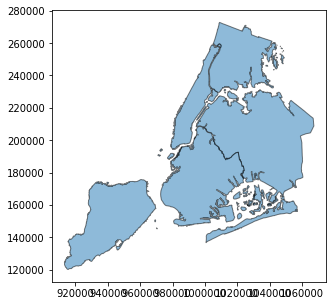

In [7]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = gdf.plot(figsize=(5,5), alpha=0.5, edgecolor='k')

Read in the city council dataset for Champaign:

In [8]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

In [9]:
gdf_councils.head()

,OBJECTID_1,District,Council_me,ShapeSTArea,ShapeSTLength,geometry
0,806,5,Vanna Pianfetti,1.807583e+08,210102.769771,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,807,3,Angie Brix,2.006700e+08,145422.313340,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,808,1,Clarissa Nickerson Fourman,1.078965e+08,83420.727972,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,809,4,Greg Stock,1.049800e+08,77363.321725,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,810,2,Alicia Beck,5.163467e+07,62219.738398,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


In [10]:
gdf_councils.describe()

,OBJECTID_1,ShapeSTArea,ShapeSTLength
count,5.000000,5.000000e+00,5.000000
mean,808.000000,1.291879e+08,115705.774241
std,1.581139,6.087498e+07,61577.368750
min,806.000000,5.163467e+07,62219.738398
25%,807.000000,1.049800e+08,77363.321725
50%,808.000000,1.078965e+08,83420.727972
75%,809.000000,1.807583e+08,145422.313340
max,810.000000,2.006700e+08,210102.769771


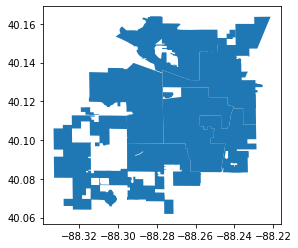

In [11]:
gdf_councils.plot()

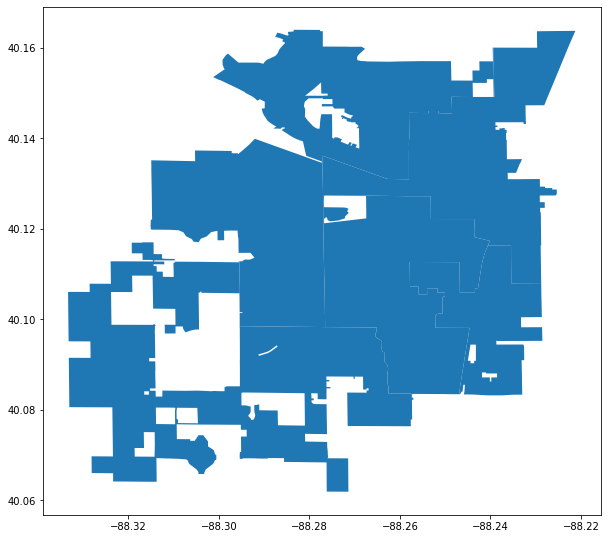

In [13]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_councils.plot(ax=ax)

plt.show()

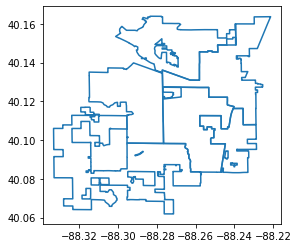

In [14]:
gdf_councils.boundary.plot()

In [16]:
gdf_councils.bounds

,minx,miny,maxx,maxy
0,-88.333303,40.061894,-88.257012,40.116995
1,-88.315071,40.098268,-88.239120,40.163956
2,-88.277158,40.107938,-88.221225,40.163721
3,-88.276971,40.083257,-88.240119,40.127432
4,-88.257818,40.083182,-88.228505,40.116346


In [17]:
gdf_councils.centroid

0    POINT (-88.30001 40.08750)
1    POINT (-88.28231 40.13389)
2    POINT (-88.24309 40.13570)
3    POINT (-88.25983 40.10719)
4    POINT (-88.24095 40.10021)
dtype: geometry

In [18]:
gdf_councils.crs

{'init': 'epsg:4326'}

In [20]:
gdf_councils.to_crs? # changing between CRS

In [21]:
gdf_councils.affine_transform? # translation between points on the earth

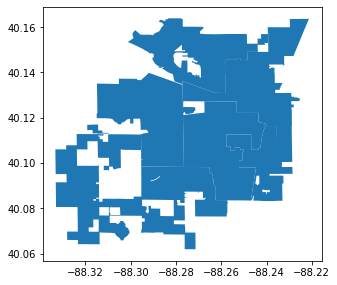

In [22]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)

plt.show()

In [23]:
gdf_props = geopandas.read_file('https://opendata.arcgis.com/datasets/3ecbc7baf1a44110a98f6d4420432000_2.geojson')

In [24]:
gdf_props.head()

,OBJECTID,COMMENTS,CB,DEPT,PIN,ACREAGE,CODE_TYPE,DESCRIPTION,TYPE,DEPT_ABBR,DESCRIP_ADDR,FUTURE,PA,ZONING,ShapeSTArea,ShapeSTLength,geometry
0,1,,,Public Works Department,412001326010,0.755*,A,Drainage/Boneyard,Boneyard Channel,PWD,Boneyard Channel,Flood Hazard Area,101.0,MHP,32930.497803,897.925620,"POLYGON ((-88.25043 40.13085, -88.25044 40.130..."
1,2,,None,Neighborhood Services Department,422012226003,4.432*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,1930.800537,272.145439,"POLYGON ((-88.24300 40.12699, -88.24300 40.127..."
2,3,,None,Neighborhood Services Department,422012226004,0.181*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,7915.196533,372.150616,"POLYGON ((-88.24300 40.12681, -88.24300 40.126..."
3,4,,None,Neighborhood Services Department,422012226005,0.186*,D,City Redevelopment,Beardsley Park Plan,NSD,1108 N Neil,Neighborhood Plan,1.0,SF 1,8104.292847,377.890980,"POLYGON ((-88.24344 40.12663, -88.24300 40.126..."
4,5,,None,Neighborhood Services Department,422012226006,0.185*,D,City Redevelopment,Beardsley Park Plan,NSD,1106 N Neil,Neighborhood Plan,1.0,SF 1,8088.671143,377.710096,"POLYGON ((-88.24344 40.12645, -88.24299 40.126..."


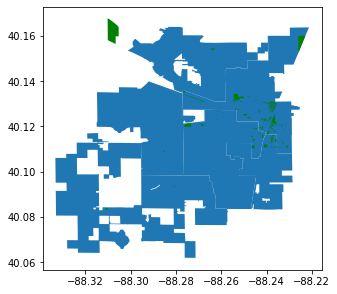

In [25]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)
gdf_props.plot(ax=ax, color='green')

plt.show()

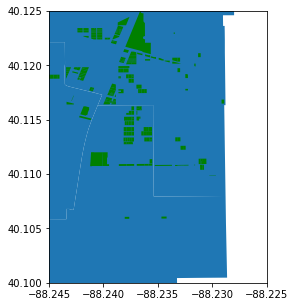

In [26]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)
gdf_props.plot(ax=ax, color='green')

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

plt.show()

**NOTE**: in the notes there are examples of plotting with the apartments dataset with legends and whatnot

In [27]:
gdf_states = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip')

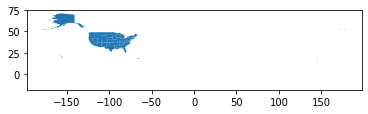

In [28]:
gdf_states.plot()

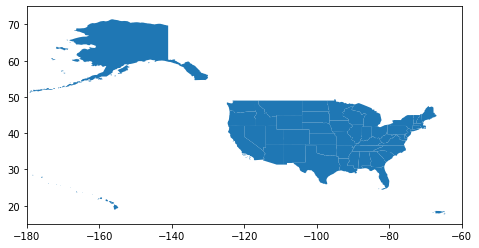

In [29]:
fig, ax = plt.subplots(figsize=(8,4))

gdf_states.plot(ax=ax)

ax.set_xlim(-180, -60)
ax.set_ylim(15, 75)
plt.show()

In [30]:
# using the ftp archive:
gdf_na = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2019/AIANNH/tl_2019_us_aiannh.zip')

In [31]:
gdf_na.head()

,AIANNHCE,AIANNHNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,COMPTYP,AIANNHR,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,2320,02419022,2320R,Mohegan,Mohegan Reservation,86,D8,R,F,G2101,A,1767260,0,+41.4900915,-072.0940543,"MULTIPOLYGON (((-72.08912 41.48040, -72.08900 ..."
1,9100,01930930,9100R,Golden Hill Paugussett,Golden Hill Paugussett (state) Reservation,86,D4,R,S,G2101,A,399343,0,+41.5521875,-072.2680204,"MULTIPOLYGON (((-72.26917 41.55472, -72.26774 ..."
2,4110,02419484,4110R,Table Mountain,Table Mountain Rancheria,85,D2,R,F,G2101,A,551202,0,+36.9848914,-119.6359563,"POLYGON ((-119.64092 36.98425, -119.64081 36.9..."
3,1380,01666180,1380R,Greenville,Greenville Rancheria,85,D2,R,F,G2101,A,284692,0,+40.1487839,-120.8933989,"POLYGON ((-120.89737 40.15100, -120.89733 40.1..."
4,1110,00806894,1110R,Flathead,Flathead Reservation,86,D2,R,F,G2101,A,5013467042,316267878,+47.4967703,-114.2842791,"POLYGON ((-114.85121 47.88721, -114.81989 47.8..."


In [32]:
# reading from downloaded file
gdf_na = geopandas.read_file('/Users/jillnaiman/Downloads/tl_2019_us_aiannh/tl_2019_us_aiannh.shp')

In [33]:
gdf_na.head()

,AIANNHCE,AIANNHNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,COMPTYP,AIANNHR,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,2320,02419022,2320R,Mohegan,Mohegan Reservation,86,D8,R,F,G2101,A,1767260,0,+41.4900915,-072.0940543,"MULTIPOLYGON (((-72.08912 41.48040, -72.08900 ..."
1,9100,01930930,9100R,Golden Hill Paugussett,Golden Hill Paugussett (state) Reservation,86,D4,R,S,G2101,A,399343,0,+41.5521875,-072.2680204,"MULTIPOLYGON (((-72.26917 41.55472, -72.26774 ..."
2,4110,02419484,4110R,Table Mountain,Table Mountain Rancheria,85,D2,R,F,G2101,A,551202,0,+36.9848914,-119.6359563,"POLYGON ((-119.64092 36.98425, -119.64081 36.9..."
3,1380,01666180,1380R,Greenville,Greenville Rancheria,85,D2,R,F,G2101,A,284692,0,+40.1487839,-120.8933989,"POLYGON ((-120.89737 40.15100, -120.89733 40.1..."
4,1110,00806894,1110R,Flathead,Flathead Reservation,86,D2,R,F,G2101,A,5013467042,316267878,+47.4967703,-114.2842791,"POLYGON ((-114.85121 47.88721, -114.81989 47.8..."


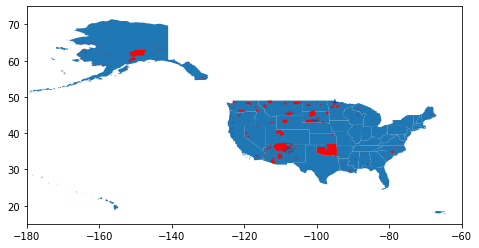

In [34]:
fig, ax = plt.subplots(figsize=(8,4))

gdf_states.plot(ax=ax)
gdf_na.plot(ax=ax, color='red')

ax.set_xlim(-180, -60)
ax.set_ylim(15, 75)
plt.show()


In [35]:
gdf_na['NAMELSAD'].unique()

array(['Mohegan Reservation',
       'Golden Hill Paugussett (state) Reservation',
       'Table Mountain Rancheria', 'Greenville Rancheria',
       'Flathead Reservation', 'Bishop Reservation',
       'Fallon Paiute-Shoshone Reservation', 'Walker River Reservation',
       'Los Coyotes Reservation', 'Manzanita Reservation',
       'Mesa Grande Reservation', 'Pala Reservation',
       'Isabella Reservation', 'Mattaponi (state) Reservation',
       'Roaring Creek Rancheria', 'Pueblo of Pojoaque',
       'Rosebud Indian Reservation', 'Woodfords Community',
       'Spokane Reservation', 'Chitimacha Reservation',
       'Coos, Lower Umpqua, and Siuslaw Reservation',
       'Pascua Pueblo Yaqui Reservation', 'Berry Creek Rancheria',
       'Enterprise Rancheria', 'Shakopee Mdewakanton Sioux Community',
       'Santa Rosa Rancheria', "L'Anse Reservation",
       'Paucatuck Eastern Pequot (state) Reservation',
       'Mississippi Choctaw Reservation', 'Duck Valley Reservation',
       'Southe

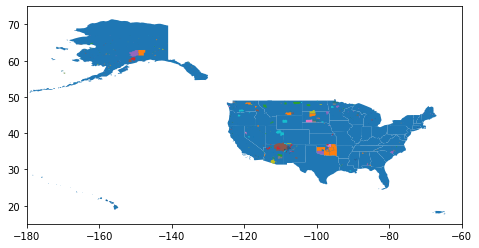

In [36]:
# coloring by different region names
fig, ax = plt.subplots(figsize=(8,4))

gdf_states.plot(ax=ax)
gdf_na.plot(column='NAMELSAD', ax=ax)

ax.set_xlim(-180, -60)
ax.set_ylim(15, 75)
plt.show()


# bqplot with other geojson files

In [37]:
import requests

In [38]:
shape_file_url = 'https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson'

In [39]:
gdata = requests.get(shape_file_url).json()

In [40]:
gdata

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID_1': 806,
    'District': '5',
    'Council_me': 'Vanna Pianfetti',
    'ShapeSTArea': 180758329.27270508,
    'ShapeSTLength': 210102.7697710323},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-88.31441072927392, 40.11698590433241],
      [-88.31453605144318, 40.11698635523766],
      [-88.31455540134952, 40.116986425022624],
      [-88.31473228495142, 40.116987061486576],
      [-88.31539756632594, 40.11698945220445],
      [-88.31620711161898, 40.11699235676648],
      [-88.31689954984104, 40.11699483563354],
      [-88.31689826989421, 40.116912488666884],
      [-88.31923827309942, 40.11691392195105],
      [-88.31921198210522, 40.11458861069375],
      [-88.31921167223642, 40.11456115781356],
      [-88.31821067635452, 40.11455754782752],
      [-88.31815342048867, 40.11455734039906],
      [-88.3180423058716, 40.11455692590576],
      [-88.31791742451107, 40.11455646084063],
    

In [44]:
# scale
sc_geo = bqplot.Mercator(scale_factor = 10000,
                         center = (-88.2434, 40.15)) # not a great projection!

# "axis"
shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# no interactions right now
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0}) # more plotting space

# plot it!
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [45]:
shape_data

{'type': 'Topology',
 'objects': {'land': {'type': 'MultiPolygon',
   'properties': {'counties': None},
   'arcs': [[[5830,
      6026,
      6034,
      6073,
      6164,
      6179,
      6023,
      6043,
      6231,
      6416,
      6410,
      6564,
      6243,
      6565,
      6546,
      6475,
      6542,
      6784,
      6741,
      6811,
      6739,
      6870,
      6965,
      7087,
      7246,
      -7086,
      7247,
      7255,
      7256,
      7257,
      7305,
      7566,
      9399,
      7668,
      9397,
      -7836,
      9398,
      7838,
      8050,
      8017,
      8018,
      8019,
      8020,
      8021,
      8047,
      8023,
      8252,
      8247,
      8302,
      8493,
      8575,
      -8491,
      8576,
      8671,
      8807,
      8877,
      8984,
      9074,
      9116,
      9138,
      9129,
      9073,
      8960,
      8874,
      8961,
      8956,
      8957,
      9090,
      9130,
      9181,
      -9123,
      9182,
      9125,
      91

In [46]:
# scale
sc_geo = bqplot.Mercator(scale_factor = 10000,
                         center = (-88.2434, 40.15)) # not a great projection!

# "axis"
#shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# marks
shape_map = bqplot.Map(map_data=gdata, scales={'projection':sc_geo})

# no interactions right now
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0}) # more plotting space

# plot it!
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [47]:
# scale
sc_geo = bqplot.Mercator(scale_factor = 200000,
                         center = (-88.2434, 40.15)) # not a great projection!

# "axis"
#shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# marks
shape_map = bqplot.Map(map_data=gdata, scales={'projection':sc_geo})

# no interactions right now
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0}) # more plotting space

# plot it!
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [48]:
gdata.keys()

dict_keys(['type', 'features'])

In [49]:
gdata['type'] # probably not it

'FeatureCollection'

In [52]:
gdata['features'][0].keys()

dict_keys(['type', 'properties', 'geometry'])

In [53]:
gdata['features'][0]['properties']

{'OBJECTID_1': 806,
 'District': '5',
 'Council_me': 'Vanna Pianfetti',
 'ShapeSTArea': 180758329.27270508,
 'ShapeSTLength': 210102.7697710323}

# Cartopy - quick plots

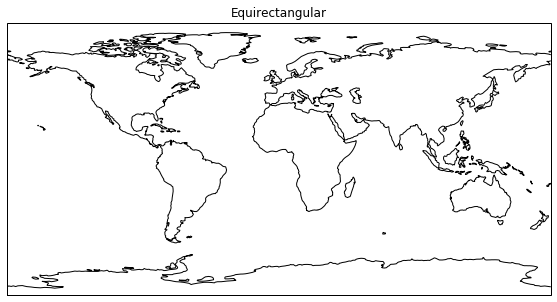

In [56]:
fig, ax = plt.subplots(figsize=(10,5), 
                      subplot_kw={'projection': cartopy.crs.PlateCarree()})
ax.coastlines()
plt.title('Equirectangular')
plt.show()

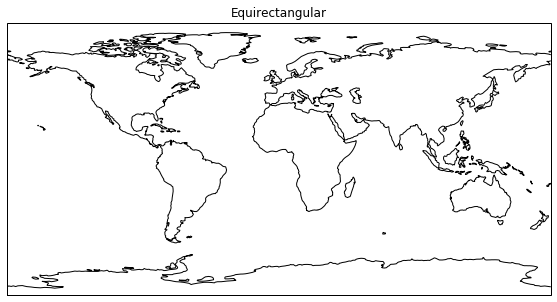

In [57]:
# making the same plot it maybe a more intuative way
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())

ax.coastlines()
plt.title('Equirectangular')
plt.show()

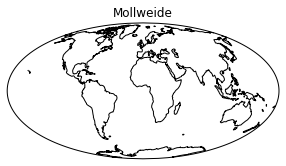

In [59]:
# making the same plot it maybe a more intuative way
fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(111, projection=cartopy.crs.Mollweide())

ax.coastlines()
plt.title('Mollweide')
plt.show()

In [60]:
champaign_lat, champaign_long = 40.1164, -88.2434
ant_lat, ant_long = -18.8792, 47.5079 # Antananarivo, capital of Madagascar

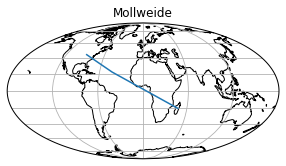

In [69]:
# making the same plot it maybe a more intuative way
fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(111, projection=cartopy.crs.Mollweide())
ax.coastlines()
ax.gridlines()
ax.set_global()

# plot these points like I would any points on a plot
ax.plot([champaign_long, ant_long], 
       [champaign_lat, ant_lat], 
       transform=cartopy.crs.PlateCarree())

plt.title('Mollweide')
plt.show()

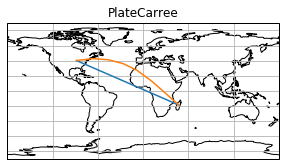

In [71]:
# making the same plot it maybe a more intuative way
fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_global()

# plot these points like I would any points on a plot
ax.plot([champaign_long, ant_long], 
       [champaign_lat, ant_lat], 
       transform=cartopy.crs.PlateCarree())
# plot these points like I would any points on a plot
ax.plot([champaign_long, ant_long], 
       [champaign_lat, ant_lat], 
       transform=cartopy.crs.Geodetic())

plt.title('PlateCarree')
plt.show()

# Reading in sensor data & plotting on a map

In [74]:
locations = pd.read_csv('https://uiuc-ischool-dataviz.github.io/spring2019online/week08/data/location.txt', 
                       delimiter='\t', header=None,
                       names=['long', 'lat', 'empty1', 'empty2'])

In [75]:
locations

,long,lat,empty1,empty2
0,-98.683,27.065,1,#
1,-98.102,26.938,1,#
2,-98.068,26.463,1,#
3,-117.110,32.889,1,#
4,-107.790,32.532,1,#
...,...,...,...,...
433,-95.623,33.198,1,#
434,-94.985,33.260,1,#
435,-94.182,33.242,1,#
436,-93.400,33.258,1,#


In [76]:
del locations['empty1'], locations['empty2']

In [77]:
locations

,long,lat
0,-98.683,27.065
1,-98.102,26.938
2,-98.068,26.463
3,-117.110,32.889
4,-107.790,32.532
...,...,...
433,-95.623,33.198
434,-94.985,33.260
435,-94.182,33.242
436,-93.400,33.258


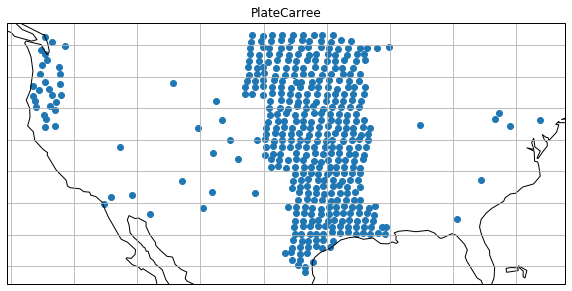

In [80]:
# making the same plot it maybe a more intuative way
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax.coastlines()
ax.gridlines()
#ax.set_global()
ax.scatter(locations['long'], locations['lat'], transform=cartopy.crs.PlateCarree())

plt.title('PlateCarree')
plt.show()

# Activity
(You can turn this stuff in for Extra Credit)

Using the tools we talked about today (and the prep notebooks if you want!): create a map with at least 2 layers.

Example layers can be:
* states, counties, etc
* water, heights (TIGER data): https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html
* Champaign data: https://gis-cityofchampaign.opendata.arcgis.com/search?collection=Dataset

Bonus: use bqplot to make it interactive

In [82]:
gdf = geopandas.read_file('/Users/jillnaiman/Downloads/world-heritage-unesco-list.geojson')

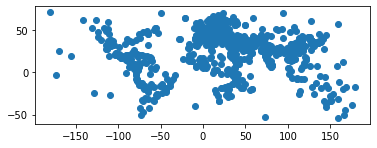

In [83]:
gdf.plot()

In [86]:
gdf = geopandas.read_file('/Users/jillnaiman/Downloads/world-heritage-unesco-list.shp')

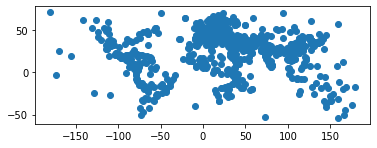

In [87]:
gdf.plot()

In [88]:
!conda list

# packages in environment at /Users/jillnaiman/opt/anaconda3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2019.03                  py37_0  
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
_tflow_select             2.3.0                       mkl  
absl-py                   0.8.1                    py37_0  
affine                    2.3.0                    pypi_0    pypi
alabaster                 0.7.12                   py37_0  
anaconda                  custom                   py37_1  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.7                    py37_1  
anaconda-project          0.8.4                      py_0  
apache-beam               2.17.0                   pypi_0    pypi
appnope                   0.1.0                    py37_0  
appscript                 1.1.0            py37h1de35cc_0  
asn1crypto                1.3.0                    py37_0  
astor            